In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [21]:
x=np.loadtxt('geom.dat')
y=np.loadtxt('TBE.dat')[:,np.newaxis]
np.random.seed(0) 
idx=np.random.permutation(len(x))
ntrain=2**12
nvalidate=2**12
x_train=x[idx[:ntrain]]
y_train=y[idx[:ntrain]]
x_validate=x[idx[ntrain:ntrain+nvalidate]]
y_validate=y[idx[ntrain:ntrain+nvalidate]]
batch_size=2**4
normalization=tf.keras.layers.Normalization(axis=None)
normalization.adapt(x)
training_set=tf.data.Dataset.from_tensor_slices((normalization(x_train), y_train)).shuffle(2**8).batch(batch_size)
validation_set=tf.data.Dataset.from_tensor_slices((normalization(x_validate), y_validate)).shuffle(2**8).batch(batch_size)

In [22]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(2**9, activation="relu"),
    tf.keras.layers.Dense(2**8, activation="relu"),
    tf.keras.layers.Dense(2**7, activation="relu"),
    tf.keras.layers.Dense(2**7, activation="relu"),
    tf.keras.layers.Dense(y.shape[-1], activation='linear')
])
def loss_fn(yt,yp):
    return tf.math.sqrt(tf.reduce_mean(tf.square(yp-yt)))
optimizer=tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=optimizer,loss=loss_fn)
csv_logger=tf.keras.callbacks.CSVLogger('training.log')
history=model.fit(training_set, epochs=2**10, verbose=1, validation_data=validation_set, callbacks=csv_logger)

# np.savetxt('result',np.concatenate((x,y,model(x).numpy()),axis=1))

Epoch 1/1024
256/256 [==============================] - 1s 2ms/step - loss: 9232.6748 - val_loss: 8943.5723
Epoch 2/1024
256/256 [==============================] - 1s 2ms/step - loss: 8592.0342 - val_loss: 8595.0625
Epoch 3/1024
256/256 [==============================] - 1s 2ms/step - loss: 8639.1387 - val_loss: 8571.3164
Epoch 4/1024
256/256 [==============================] - 1s 2ms/step - loss: 8622.2471 - val_loss: 8871.8672
Epoch 5/1024
256/256 [==============================] - 1s 2ms/step - loss: 8580.9277 - val_loss: 10078.1729
Epoch 6/1024
256/256 [==============================] - 1s 2ms/step - loss: 8633.6465 - val_loss: 8636.2168
Epoch 7/1024
256/256 [==============================] - 1s 2ms/step - loss: 8564.6465 - val_loss: 8924.2773
Epoch 8/1024
256/256 [==============================] - 1s 2ms/step - loss: 8457.5068 - val_loss: 8363.6094
Epoch 9/1024
256/256 [==============================] - 1s 2ms/step - loss: 8378.2324 - val_loss: 8209.9883
Epoch 10/1024
256/256 [====

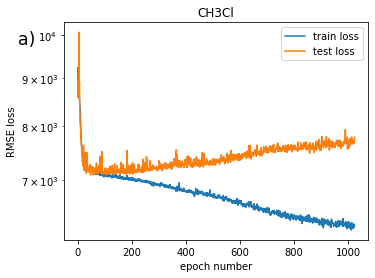

In [41]:
plt.figure(figsize=(12, 4))
# plt.gcf().supxlabel('epoch number')
# plt.gcf().supylabel('RMSE loss')

plt.subplot(121)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.gca().set_yscale('log')
plt.title('CH3Cl')
plt.gca().axes.set_xlabel("epoch number")
plt.gca().axes.set_ylabel("RMSE loss")
plt.text(x=-0.15, y=0.9, s='a)', fontsize='xx-large', transform=plt.gca().transAxes)
plt.legend()